# Exploring SQuAD2.0

### Library Imports

In [1]:
import numpy as np
import pandas as pd
from pandas import option_context
from termcolor import colored
import string

The dataset was introduced by {cite:p}`SQuAD2.0`, the NLP group at Stanford.

### Loading in the dataset
Training Set Dataset download: [https://rajpurkar.github.io/SQuAD-explorer/dataset/train-v2.0.json](https://rajpurkar.github.io/SQuAD-explorer/dataset/train-v2.0.json)

In [2]:
# Path to local file
df = pd.read_json('../../squad2dataset/train-v2.0.json')

with option_context('display.max_colwidth', 125):
    display(df.head())

,version,data
0,v2.0,"{'title': 'Beyoncé', 'paragraphs': [{'qas': [{'question': 'When did Beyonce start becoming popular?', 'id': '56be85543aea..."
1,v2.0,"{'title': 'Frédéric_Chopin', 'paragraphs': [{'qas': [{'question': ""What was Frédéric's nationalities?"", 'id': '56cbd2356d..."
2,v2.0,"{'title': 'Sino-Tibetan_relations_during_the_Ming_dynasty', 'paragraphs': [{'qas': [{'question': 'Who were Wang Jiawei an..."
3,v2.0,"{'title': 'IPod', 'paragraphs': [{'qas': [{'question': 'Which company produces the iPod?', 'id': '56cc55856d243a140015ef0..."
4,v2.0,"{'title': 'The_Legend_of_Zelda:_Twilight_Princess', 'paragraphs': [{'qas': [{'question': 'What category of game is Legend..."


In [3]:
topic_titles = []

for topic in df["data"]:
    topic_titles.append(topic["title"])

print(np.random.choice(topic_titles, size=5))

['Genocide' 'Protestantism' 'Baptists' 'East_India_Company' 'Infrared']


In [4]:
# Create a list of all the contexts in the dataset

context_list = []
context_count = 0

for topic in range(len(df)):
    topic_data = df.iloc[topic]["data"]
    for context_paragraph in range(len(topic_data["paragraphs"])):
        context_count += 1
        context_list.append(topic_data["paragraphs"][context_paragraph]["context"])
#         print(df.iloc[topic]["data"]["paragraphs"])

print("Total number of Contexts:", context_count)

Total number of Contexts: 19035


In [5]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
tokenized_context_length = []

for context in context_list:
    tokenized_context_length.append(len(tokenizer.tokenize(context)))
    
print("Mean tokenized context length: ", np.mean(tokenized_context_length))

Mean tokenized context length:  151.62348305752562


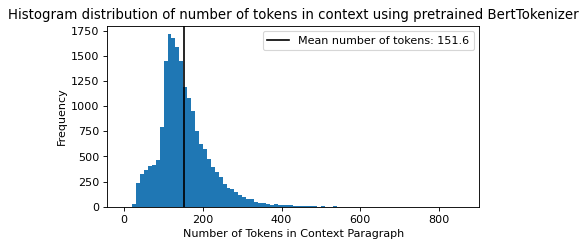

Minimum number of tokens in Context paragraph: 25
Maximum number of tokens in Context paragraph: 853


In [6]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(6, 3), dpi=80)
plt.hist(tokenized_context_length, bins=[10*i for i in range(87)])
plt.title("Histogram distribution of number of tokens in context using pretrained BertTokenizer")
plt.xlabel('Number of Tokens in Context Paragraph')
plt.ylabel('Frequency')

mean_tc = np.mean(tokenized_context_length)
min_tc = np.min(tokenized_context_length)
max_tc = np.max(tokenized_context_length)

plt.axvline(x = mean_tc, color = 'black', label = f'Mean number of tokens: {np.round(mean_tc, decimals=1)}')
plt.legend()
plt.show()

print("Minimum number of tokens in Context paragraph:", min_tc)
print("Maximum number of tokens in Context paragraph:", max_tc)